# Shapley values for explanation of predictions by JSM-classifier


The backend is available at https://www.dropbox.com/s/qq2r51vof62kjjx/MyBicluster.py?dl=0

In [1]:
import MyBicluster as mb
import matplotlib.pyplot as plt

## 1. Data loading

In [2]:
pc=mb.Context("credit.txt") # available at https://www.dropbox.com/s/0dky5pg1h9583ew/credit.txt?dl=0

In [3]:
nc=mb.Context("nocredit.txt") # available at https://www.dropbox.com/s/toq0hnzcw0wiopz/nocredit.txt?dl=0

In [4]:
pc.nObj

4

In [5]:
pc.nAttr

11

In [6]:
pc.attr_names

['M', 'F', 'Y', 'Mi', 'O', 'HE', 'Sp', 'Se', 'HS', 'A', 'L']

In [7]:
pc.objects

[[1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0],
 [0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0],
 [0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0],
 [1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]]

In [8]:
nc.objects

[[1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1],
 [0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0],
 [0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0],
 [1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1]]

In [9]:
nc.nObj

4

In [10]:
nc.nAttr

11

In [117]:
nc.attr_names

['M', 'F', 'Y', 'Mi', 'O', 'HE', 'Sp', 'Se', 'HS', 'A', 'L']

## 2. Concept Generation

In [11]:
L=mb.NextClosure(pc)

NextClosure has been started
NextClosure has finished its job


In [12]:
L

[([], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]),
 ([3], [0, 4, 5, 8]),
 ([2], [1, 3, 5, 9]),
 ([1], [1, 3, 6, 8]),
 ([1, 2], [1, 3]),
 ([0], [0, 2, 5, 8]),
 ([0, 3], [0, 5, 8]),
 ([0, 2, 3], [5]),
 ([0, 1, 3], [8]),
 ([0, 1, 2, 3], [])]

In [13]:
L,E=mb.coverGraph(pc,L)

In [121]:
E

[(5, 0),
 (3, 0),
 (2, 0),
 (1, 0),
 (6, 1),
 (7, 2),
 (4, 2),
 (8, 3),
 (4, 3),
 (9, 4),
 (6, 5),
 (8, 6),
 (7, 6),
 (9, 7),
 (9, 8)]

## 3. Hypotheses Generation

In [14]:
hyps=mb.minHyp(pc,nc,L,E)


In [123]:
hyps

[[1, 3, 5, 9], [1, 3, 6, 8], [0, 5, 8], [8]]

In [15]:
E

[(5, 0),
 (3, 0),
 (2, 0),
 (1, 0),
 (6, 1),
 (7, 2),
 (4, 2),
 (8, 3),
 (4, 3),
 (9, 4),
 (6, 5),
 (8, 6),
 (7, 6),
 (9, 7),
 (9, 8)]

In [16]:
from collections import defaultdict

c = defaultdict(list)
for k, v in E:
    c[k].append(v)

In [18]:
c

defaultdict(list,
            {1: [0],
             2: [0],
             3: [0],
             4: [2, 3],
             5: [0],
             6: [1, 5],
             7: [2, 6],
             8: [3, 6],
             9: [4, 7, 8]})

In [19]:
nc.objects

[[1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1],
 [0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0],
 [0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0],
 [1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1]]

In [128]:
for i in nc.objects: print(i)

[1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1]
[0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0]
[0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0]
[1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1]


In [20]:
for i in hyps:
    print(mb.int2names(pc,i))

['F', 'Mi', 'HE', 'A']
['F', 'Mi', 'Sp', 'HS']
['M', 'HE', 'HS']
['HS']


In [21]:
for i in pc.objects: print(i)

[1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0]
[0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0]
[0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0]
[1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]


In [22]:
pc.attr_names

['M', 'F', 'Y', 'Mi', 'O', 'HE', 'Sp', 'Se', 'HS', 'A', 'L']

In [23]:
L

[([], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]),
 ([3], [0, 4, 5, 8]),
 ([2], [1, 3, 5, 9]),
 ([1], [1, 3, 6, 8]),
 ([1, 2], [1, 3]),
 ([0], [0, 2, 5, 8]),
 ([0, 3], [0, 5, 8]),
 ([0, 2, 3], [5]),
 ([0, 1, 3], [8]),
 ([0, 1, 2, 3], [])]

In [24]:
phyps=mb.reduceNonMinHyp(hyps)

In [25]:
hyps

[[1, 3, 5, 9], [1, 3, 6, 8], [0, 5, 8], [8]]

In [26]:
phyps

[[1, 3, 5, 9], [8]]

In [27]:
nL=mb.NextClosure(nc)

NextClosure has been started
NextClosure has finished its job


In [28]:
nL,nE=mb.coverGraph(nc,nL)

In [29]:
nhyps=mb.minHyp(nc,pc,nL,nE)

In [30]:
nhyps

[[0, 4, 7, 10], [1, 4, 6, 9], [7], [1, 3, 7, 9], [0, 10]]

In [31]:
nhyps=mb.reduceNonMinHyp(nhyps)

In [32]:
for i in nhyps:
    print(mb.int2names(nc,i))

['F', 'O', 'Sp', 'A']
['Se']
['M', 'L']


In [33]:
for i in phyps:
    print(mb.int2names(pc,i))

['F', 'Mi', 'HE', 'A']
['HS']


## 4. Inference (prediction) stage

g9'={F, young, special, high}

g10'={F, old, higher, average}

g11'={M, middle, special, average}

g12'={M, old, higher, average}


In [34]:
pc.attr_names

['M', 'F', 'Y', 'Mi', 'O', 'HE', 'Sp', 'Se', 'HS', 'A', 'L']

In [35]:
g9=[0,1,1,0,0,0,1,0,1,0,0]
#[F, young, special, high]

len(g9)

11

In [36]:
mb.list2Int(g9)

[1, 2, 6, 8]

In [38]:
mb.int2names(pc,mb.list2Int(g9))

['F', 'Y', 'Sp', 'HS']

In [147]:
mb.JSMClassifyer(mb.list2Int(g9),phyps,nhyps)

1

In [39]:
nhyps

[[1, 4, 6, 9], [7], [0, 10]]

In [40]:
g10=[0,1,0,0,1,1,0,0,0,1,0]
#[F, old, higher, average]
g11=[1,0,0,1,0,0,0,1,0,0,1]
#[M, middle, secondary, low]
g12=[1,0,0,0,1,0,0,1,1,0,0]
#[M, old, secondary, low]

In [41]:
mb.JSMClassifyer(mb.list2Int(g10),phyps,nhyps)

0

In [42]:
mb.int2names(pc,mb.list2Int(g10))

['F', 'O', 'HE', 'A']

In [43]:
mb.JSMClassifyer(mb.list2Int(g11),phyps,nhyps)

-1

In [44]:
mb.int2names(pc,mb.list2Int(g11))

['M', 'Mi', 'Se', 'L']

In [45]:
mb.JSMClassifyer(mb.list2Int(g12),phyps,nhyps)

0

In [46]:
mb.list2Int(g10)

[1, 4, 5, 9]

In [47]:
mb.int2names(pc,mb.list2Int(g12))

['M', 'O', 'Se', 'HS']

In [48]:
phyps

[[1, 3, 5, 9], [8]]

In [49]:
for i in nhyps:
    print(mb.int2names(nc,i))

['F', 'O', 'Sp', 'A']
['Se']
['M', 'L']


In [50]:
for i in phyps:
    print(mb.int2names(pc,i))

['F', 'Mi', 'HE', 'A']
['HS']


In [51]:
mb.JSMClassifyer(mb.list2Int(g12),phyps,nhyps)

0

# 5. Shapley value computation

In [52]:
import scipy.special

In [53]:
from itertools import chain, combinations

def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

In [54]:
p=powerset(["a", "b","c"])

In [55]:
list(p)

[(),
 ('a',),
 ('b',),
 ('c',),
 ('a', 'b'),
 ('a', 'c'),
 ('b', 'c'),
 ('a', 'b', 'c')]

In [95]:
def ShapVal(gprime,i,pc,nc):
    #oset=[]
    #oset.append(g)
    #print(oset)
    #gprime=pc.objPrime(oset)
    domain=gprime[:]
    ret=1.0/len(gprime)
    #print(ret)
    if i in domain:
        domain.remove(i)
    else:
        return 0
   
    power=powerset(domain)
    power=[list(s) for s in power]
    #print(power)
    L=mb.NextClosure(pc)
    L,E=mb.coverGraph(pc,L)
    hyps=mb.minHyp(pc,nc,L,E)
    phyps=mb.reduceNonMinHyp(hyps)
    nL=mb.NextClosure(nc)
    nL,nE=mb.coverGraph(nc,nL)
    nhyps=mb.minHyp(nc,pc,nL,nE)
    nhyps=mb.reduceNonMinHyp(nhyps)
    
    #print("phyps=",phyps)
    #print("nhyps=",nhyps)
    
    summ=0
    for s in power:
        si=[]
        si.extend(s)
        si.append(i)
        vs=mb.JSMClassifyer(s,phyps,nhyps)
        vsi=mb.JSMClassifyer(si,phyps,nhyps)
        #print("1/scipy.special.binom(len(gprime)-1,len(s))",1/scipy.special.binom(len(gprime)-1,len(s)))
        #print("len(gprime)-1",len(gprime)-1,"len(s)",len(s))
        summ=summ+1.0/scipy.special.binom(len(gprime)-1,len(s))*(vsi-vs)
        #print("s=",s)
        #print("si=",si)
        #print("vs=",vs)
        #print("vsi=",vsi)
        #print("summ=",summ)
       
    return ret*summ   

In [96]:
ShapVal(mb.list2Int(g9),1,pc,nc)

NextClosure has been started
NextClosure has finished its job
NextClosure has been started
NextClosure has finished its job


0.0

In [97]:
ShapV=[ShapVal(mb.list2Int(g9),i,pc,nc) for i in range(len(g9))]

NextClosure has been started
NextClosure has finished its job
NextClosure has been started
NextClosure has finished its job
NextClosure has been started
NextClosure has finished its job
NextClosure has been started
NextClosure has finished its job
NextClosure has been started
NextClosure has finished its job
NextClosure has been started
NextClosure has finished its job
NextClosure has been started
NextClosure has finished its job
NextClosure has been started
NextClosure has finished its job


In [98]:
ShapV

[0, 0.0, 0.0, 0, 0, 0, 0.0, 0, 1.0, 0, 0]

In [99]:
ShapV=[ShapVal(mb.list2Int(g10),i,pc,nc) for i in range(len(g10))]    

NextClosure has been started
NextClosure has finished its job
NextClosure has been started
NextClosure has finished its job
NextClosure has been started
NextClosure has finished its job
NextClosure has been started
NextClosure has finished its job
NextClosure has been started
NextClosure has finished its job
NextClosure has been started
NextClosure has finished its job
NextClosure has been started
NextClosure has finished its job
NextClosure has been started
NextClosure has finished its job


In [100]:
ShapV

[0, 0.0, 0, 0, 0.0, 0.0, 0, 0, 0, 0.0, 0]

In [101]:
sum(ShapV)

0.0

In [103]:
ShapV=[ShapVal(mb.list2Int(g11),i,pc,nc) for i in range(len(g11))]

NextClosure has been started
NextClosure has finished its job
NextClosure has been started
NextClosure has finished its job
NextClosure has been started
NextClosure has finished its job
NextClosure has been started
NextClosure has finished its job
NextClosure has been started
NextClosure has finished its job
NextClosure has been started
NextClosure has finished its job
NextClosure has been started
NextClosure has finished its job
NextClosure has been started
NextClosure has finished its job


In [104]:
ShapV

[-0.16666666666666666,
 0,
 0,
 0.0,
 0,
 0,
 0,
 -0.66666666666666663,
 0,
 0,
 -0.16666666666666666]

In [105]:
1/6

0

In [106]:
plt.stem(ShapV)

<Container object of 3 artists>

In [107]:
ShapV=[ShapVal(mb.list2Int(g12),i,pc,nc) for i in range(len(g12))]

NextClosure has been started
NextClosure has finished its job
NextClosure has been started
NextClosure has finished its job
NextClosure has been started
NextClosure has finished its job
NextClosure has been started
NextClosure has finished its job
NextClosure has been started
NextClosure has finished its job
NextClosure has been started
NextClosure has finished its job
NextClosure has been started
NextClosure has finished its job
NextClosure has been started
NextClosure has finished its job


In [108]:
ShapV

[0.0, 0, 0, 0, 0.0, 0, 0, -1.0, 1.0, 0, 0]

In [79]:
plt.stem(ShapV)

<Container object of 3 artists>

In [80]:
mb.JSMClassifyer([5, 6, 9, 1],phyps,nhyps)

0

# 6. Experiments with Zoo dataset


In [180]:
pcz=mb.Context("zoo_mam.txt") # available at https://www.dropbox.com/s/ggkikg2ez1dieag/zoo_mam.txt?dl=0

In [181]:
ncz=mb.Context("zoo_not_mam.txt") # available at https://www.dropbox.com/s/fgol7f9hjhdwc2k/zoo_not_mam.txt?dl=0

In [182]:
pcz.nObj

41

In [183]:
pcz.nAttr

21

In [184]:
pcz.attr_names

['hair',
 'feathers',
 'eggs',
 'milk',
 'airborne',
 'aquatic',
 'predator',
 'toothed',
 'backbone',
 'breathes',
 'venomous',
 'fins',
 'legs (4)',
 'legs (0)',
 'legs (2)',
 'legs (6)',
 'legs (8)',
 'legs (5)',
 'tail',
 'domestic',
 'catsize']

In [185]:
pc_names=['aardvark', 'antelope', 'bear', 'boar', 'buffalo', 'calf', 'cavy', 'cheetah', 'deer', 'dolphin', 'elephant', 'fruitbat', 'giraffe', 'girl', 'goat', 'gorilla', 'hamster', 'hare', 'leopard', 'lion', 'lynx', 'mink', 'mole', 'mongoose', 'opossum', 'oryx', 'platypus', 'polecat', 'pony', 'porpoise', 'puma', 'pussycat', 'raccoon', 'reindeer', 'seal', 'sealion', 'squirrel', 'vampire', 'vole', 'wallaby', 'wolf']

In [186]:
pcz.objects

[[1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
 [1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1],
 [1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
 [1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1],
 [1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1],
 [1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1],
 [1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
 [1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1],
 [1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1],
 [0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1],
 [1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1],
 [1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
 [1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1],
 [1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1],
 [1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1],
 [1, 0, 0,

In [187]:
nc_names=['bass', 'carp', 'catfish', 'chicken', 'chub', 'clam', 'crab', 'crayfish', 'crow', 'dogfish', 'dove', 'duck', 'flamingo', 'flea', 'frog', 'frog', 'gnat', 'gull', 'haddock', 'hawk', 'herring', 'honeybee', 'housefly', 'kiwi', 'ladybird', 'lark', 'lobster', 'moth', 'newt', 'octopus', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'pike', 'piranha', 'pitviper', 'rhea', 'scorpion', 'seahorse', 'seasnake', 'seawasp', 'skimmer', 'skua', 'slowworm', 'slug', 'sole', 'sparrow', 'starfish', 'stingray', 'swan', 'termite', 'toad', 'tortoise', 'tuatara', 'tuna', 'vulture', 'wasp', 'worm', 'wren']

In [188]:
ncz.objects

[[0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0],
 [0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0],
 [0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0],
 [0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
 [0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1],
 [0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0],
 [0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
 [0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1,

In [189]:
ncz.nObj

60

In [190]:
ncz.nAttr

21

In [191]:
ncz.attr_names

['hair',
 'feathers',
 'eggs',
 'milk',
 'airborne',
 'aquatic',
 'predator',
 'toothed',
 'backbone',
 'breathes',
 'venomous',
 'fins',
 'legs (4)',
 'legs (0)',
 'legs (2)',
 'legs (6)',
 'legs (8)',
 'legs (5)',
 'tail',
 'domestic',
 'catsize']

In [192]:
Lz=mb.NextClosure(pcz)

NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job


In [193]:
Lz

[([],
  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),
 ([35], [0, 3, 5, 6, 7, 8, 9, 11, 14, 18, 20]),
 ([35, 39], [0, 3, 7, 8, 9, 14, 18, 20]),
 ([34], [0, 3, 5, 6, 7, 8, 9, 11, 13, 20]),
 ([34, 35], [0, 3, 5, 6, 7, 8, 9, 11, 20]),
 ([31], [0, 3, 6, 7, 8, 9, 12, 18, 19, 20]),
 ([26], [0, 2, 3, 5, 6, 8, 9, 12, 18, 20]),
 ([21], [0, 3, 5, 6, 7, 8, 9, 12, 18, 20]),
 ([21, 35], [0, 3, 5, 6, 7, 8, 9, 18, 20]),
 ([21, 34, 35], [0, 3, 5, 6, 7, 8, 9, 20]),
 ([21, 26], [0, 3, 5, 6, 8, 9, 12, 18, 20]),
 ([21, 26, 35], [0, 3, 5, 6, 8, 9, 18, 20]),
 ([21, 26, 34, 35], [0, 3, 5, 6, 8, 9, 20]),
 ([13], [0, 3, 6, 7, 8, 9, 14, 19, 20]),
 ([13, 35], [0, 3, 6, 7, 8, 9, 14, 20]),
 ([13, 31], [0, 3, 6, 7, 8, 9, 19, 20]),
 ([13, 15, 35, 39], [0, 3, 7, 8, 9, 14, 20]),
 ([11, 37], [0, 3, 4, 7, 8, 9, 14, 18]),
 ([11, 35, 36, 37, 39], [0, 3, 7, 8, 9, 14, 18]),
 ([11, 13, 15, 35, 36, 37, 39], [0, 3, 7, 8, 9, 14]),
 ([9, 29], [3, 5, 6, 7, 8, 9, 11, 13, 18, 20]),
 ([9, 29, 35], [3, 

In [194]:
Lz,Ez=mb.coverGraph(pcz,Lz)

I have just added edge number 100
I have just added edge number 200


In [195]:
Ez

[(20, 0),
 (17, 0),
 (13, 0),
 (7, 0),
 (6, 0),
 (5, 0),
 (3, 0),
 (1, 0),
 (21, 1),
 (14, 1),
 (8, 1),
 (4, 1),
 (2, 1),
 (46, 2),
 (18, 2),
 (16, 2),
 (22, 3),
 (4, 3),
 (23, 4),
 (9, 4),
 (33, 5),
 (28, 5),
 (15, 5),
 (10, 6),
 (33, 7),
 (10, 7),
 (8, 7),
 (34, 8),
 (24, 8),
 (11, 8),
 (9, 8),
 (61, 9),
 (25, 9),
 (12, 9),
 (35, 10),
 (11, 10),
 (36, 11),
 (26, 11),
 (12, 11),
 (62, 12),
 (27, 12),
 (15, 13),
 (14, 13),
 (61, 14),
 (16, 14),
 (61, 15),
 (30, 15),
 (71, 16),
 (19, 16),
 (18, 17),
 (51, 18),
 (19, 18),
 (77, 19),
 (22, 20),
 (21, 20),
 (24, 21),
 (23, 21),
 (23, 22),
 (25, 23),
 (41, 24),
 (26, 24),
 (25, 24),
 (65, 25),
 (27, 25),
 (42, 26),
 (27, 26),
 (66, 27),
 (45, 28),
 (30, 28),
 (29, 28),
 (49, 29),
 (31, 29),
 (71, 30),
 (32, 30),
 (75, 31),
 (32, 31),
 (77, 32),
 (57, 33),
 (45, 33),
 (37, 33),
 (35, 33),
 (34, 33),
 (61, 34),
 (46, 34),
 (41, 34),
 (38, 34),
 (36, 34),
 (58, 35),
 (47, 35),
 (39, 35),
 (36, 35),
 (62, 36),
 (48, 36),
 (42, 36),
 (40, 36),
 

In [196]:
hypsz=mb.minHyp(pcz,ncz,Lz,Ez)

In [197]:
hypsz

[[3, 8, 9]]

In [198]:
for i in hypsz:
    print(mb.int2names(pcz,i))

['milk', 'backbone', 'breathes']


In [199]:
phypsz=mb.reduceNonMinHyp(hypsz)

In [200]:
phypsz

[[3, 8, 9]]

In [201]:
nLz=mb.NextClosure(ncz)

NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 130
I have just calculate concept number 140
I have just calculate concept number 150
I have just calculate concept number 160
NextClosure has finished its job


In [202]:
nLz,nEz=mb.coverGraph(ncz,nLz)

I have just added edge number 100
I have just added edge number 200
I have just added edge number 300
I have just added edge number 400


In [203]:
nhypsz=mb.minHyp(ncz,pcz,nLz,nEz)

In [204]:
nhypsz

[[10],
 [9, 10],
 [6, 9, 10],
 [6, 9, 10, 18],
 [2, 6, 7, 8, 9, 18],
 [2, 5, 6, 7, 8, 9, 12, 18],
 [1, 2, 5, 6, 8, 9, 14, 18],
 [1, 2, 6, 8, 9, 14, 18],
 [2, 4, 6, 9],
 [2, 6, 7, 8, 9],
 [2, 5, 6, 7, 8, 9, 12],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [2, 6, 7, 8, 9, 12, 18],
 [1, 2, 8, 9, 14, 18, 20],
 [1, 2, 5, 8, 9, 14, 18],
 [1, 2, 8, 9, 14, 18],
 [2, 9, 13],
 [2, 9, 10],
 [2, 9, 15],
 [2, 4, 9],
 [2, 7, 8, 9, 12],
 [2, 7, 8, 9],
 [2, 5, 7, 8, 9, 12],
 [6, 16],
 [6, 10],
 [6, 10, 18],
 [6, 7, 8, 10, 13, 18],
 [5, 6, 7, 8, 10, 13, 18],
 [2, 5, 6, 7, 8, 11, 13, 18],
 [2, 6, 7, 8, 13, 18],
 [2, 5, 6, 7, 8, 18],
 [2, 6, 7, 8, 18],
 [1, 2, 5, 6, 8, 9, 14, 18, 20],
 [2, 5, 6, 7, 8, 11, 13, 18, 20],
 [1, 2, 6, 8, 9, 14, 18, 20],
 [6, 7, 8, 10],
 [5, 6, 7, 8, 10],
 [2, 5, 6, 7, 8],
 [2, 6, 7, 8],
 [5, 6, 10],
 [5, 6, 10, 13],
 [2, 5, 6, 13],
 [2, 5, 6, 17],
 [2, 5, 6, 10],
 [2, 5, 6, 16, 20],
 [2, 5, 6, 15],
 [6, 10, 13],
 [2, 6, 13],
 [2, 6, 10],
 [2, 

In [205]:
nhypsz=mb.reduceNonMinHyp(nhypsz)

In [206]:
for i in nhypsz:
    print(mb.int2names(ncz,i))

['venomous']
['feathers', 'eggs', 'backbone', 'breathes', 'legs (2)', 'tail']
['eggs', 'airborne', 'breathes']
['predator', 'legs (8)']
['eggs', 'aquatic', 'predator', 'legs (5)']
['eggs', 'legs (0)']
['eggs', 'toothed', 'backbone']
['eggs', 'legs (6)']
['eggs', 'domestic']


In [207]:
poscl=[mb.JSMClassifyer(mb.list2Int(g),phypsz,nhypsz) for g in pcz.objects]    

In [208]:
poscl

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [209]:
negcl=[mb.JSMClassifyer(mb.list2Int(g),phypsz,nhypsz) for g in ncz.objects]

In [210]:
negcl

[-1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1]

In [211]:
def ShapV(g,pc,nc):
    return [ShapVal(mb.list2Int(g),i,pc,nc) for i in range(len(g))]

In [212]:
mamShV=[ShapV(g,pcz,ncz) for g in pcz.objects]

NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 1

I have just calculate concept number 130
I have just calculate concept number 140
I have just calculate concept number 150
I have just calculate concept number 160
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
I have just added edge number 300
I have just added edge number 400
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concep

I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 130
I have just calculate concept number 140
I have just calculate concept number 150
I have just calculate concept number 160
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
I have just added edge number 300
I have just added edge number 400
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just 

NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 1

I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 130
I have just calculate concept number 140
I have just calculate concept number 150
I have just calculate concept number 160
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
I have just added edge number 300
I have just added edge number 400
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept numbe

NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 1

I have just added edge number 200
I have just added edge number 300
I have just added edge number 400
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calcul

I have just added edge number 300
I have just added edge number 400
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just

I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 130
I have just calculate concept number 140
I have just calculate concept number 150
I have just calculate concept number 160
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
I have just added edge number 300
I have just added edge number 400
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept numbe

NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 1

NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 1

I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 130
I have just calculate concept number 140
I have just calculate concept number 150
I have just calculate concept number 160
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
I have just added edge number 300
I have just added edge number 400
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate con

NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 1

I have just added edge number 400
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I ha

I have just added edge number 300
I have just added edge number 400
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just

NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 1

NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 1

NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 1

NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 1

I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 130
I have just calculate concept number 140
I have just calculate concept number 150
I have just calculate concept number 160
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
I have just added edge number 300
I have just added edge number 400
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept numbe

I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 130
I have just calculate concept number 140
I have just calculate concept number 150
I have just calculate concept number 160
NextClosure has finished its job
I have just added edge number 

I have just calculate concept number 140
I have just calculate concept number 150
I have just calculate concept number 160
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
I have just added edge number 300
I have just added edge number 400
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept

I have just added edge number 200
I have just added edge number 300
I have just added edge number 400
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calcul

I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 130
I have just calculate concept number 140
I have just calculate concept number 150
I have just calculate concept number 160
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
I have just added edge number 300
I have just added edge number 400
NextClosure has been started
I have just calculate concept number 10
I have just calcul

NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 1

NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 1

NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 1

NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 1

I have just calculate concept number 150
I have just calculate concept number 160
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
I have just added edge number 300
I have just added edge number 400
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept 

I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 130
I have just calculate concept number 140
I have just calculate concept number 150
I have just calculate concept number 160
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
I have just added edge number 300
I have just added edge number 400
NextClosure ha

NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 1

NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 1

NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 1

NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 1

I have just calculate concept number 130
I have just calculate concept number 140
I have just calculate concept number 150
I have just calculate concept number 160
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
I have just added edge number 300
I have just added edge number 400
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concep

I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 130
I have just calculate concept number 140
I have just calculate concept number 150
I have just calculate concept number 160
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
I have just added edge number 300
I have just added edge number 400
NextClosure ha

NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 1

I have just added edge number 100
I have just added edge number 200
I have just added edge number 300
I have just added edge number 400
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate con

NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 1

NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 1

NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 1

I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 130
I have just calculate concept number 140
I have just calculate concept number 150
I have just calculate concept number 160
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
I have just added edge number 300
I have just added edge number 400
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept numbe

NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 1

NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 1

NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 1

I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 130
I have just calculate concept number 140
I have just calculate concept number 150
I have just calculate concept number 160
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
I have just added edge number 300
I have just added edge number 400
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate con

NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 1

NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 1

I have just added edge number 200
I have just added edge number 300
I have just added edge number 400
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calcul

NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 1

I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 130
I have just calculate concept number 140
I have just calculate concept number 150
I have just calculate concept number 160
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
I have just added edge number 300
I have just added edge number 400
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate con

NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 1

In [213]:
nonmamShV=[ShapV(g,pcz,ncz) for g in ncz.objects]

NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 1

NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 1

NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 1

NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 1

NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 1

NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 1

I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 130
I have just calculate concept number 140
I have just calculate concept number 150
I have just calculate concept number 160
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
I have just added edge number 300
I have just added edge number 400
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure ha

NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 1

I have just calculate concept number 150
I have just calculate concept number 160
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
I have just added edge number 300
I have just added edge number 400
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept 

I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 130
I have just calculate concept number 140
I have just calculate concept number 150
I have just calculate concept number 160
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
I have just added edge number 300
I have just added edge number 400
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just 

NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 1

NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 1

NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 1

I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 130
I have just calculate concept number 140
I have just calculate concept number 150
I have just calculate concept number 160
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
I have just added edge number 300
I have just added edge number 400
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have j

I have just added edge number 200
I have just added edge number 300
I have just added edge number 400
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calcul

I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 130
I have just calculate concept number 140
I have just calculate concept number 150
I have just calculate concept number 160
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
I have just added edge number 300
I have just added edge number 400
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept numbe

NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 1

NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 1

NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 1

NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 1

I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 130
I have just calculate concept number 140
I have just calculate concept number 150
I have just calculate concept number 160
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
I have just added edge number 300
I have just added edge number 400
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate conc

I have just calculate concept number 150
I have just calculate concept number 160
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
I have just added edge number 300
I have just added edge number 400
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept 

NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 1

I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 130
I have just calculate concept number 140
I have just calculate concept number 150
I have just calculate concept number 160
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
I have just added edge number 300
I have just added edge number 400
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept numbe

I have just added edge number 200
I have just added edge number 300
I have just added edge number 400
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calcul

I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 130
I have just calculate concept number 140
I have just calculate concept number 150
I have just calculate concept number 160
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
I have just added edge number 300
I have just added edge number 400
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate conc

I have just calculate concept number 140
I have just calculate concept number 150
I have just calculate concept number 160
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
I have just added edge number 300
I have just added edge number 400
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept

NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 1

I have just added edge number 200
I have just added edge number 300
I have just added edge number 400
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calcul

I have just calculate concept number 140
I have just calculate concept number 150
I have just calculate concept number 160
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
I have just added edge number 300
I have just added edge number 400
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept

I have just calculate concept number 160
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
I have just added edge number 300
I have just added edge number 400
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept n

I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 130
I have just calculate concept number 140
I have just calculate concept number 150
I have just calculate concept number 160
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
I have just added edge number 300
I have just added edge number 400
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate con

NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 1

NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 1

NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 1

I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 130
I have just calculate concept number 140
I have just calculate concept number 150
I have just calculate concept number 160
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
I have just added edge number 300
I have just added edge number 400
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate con

NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 1

NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 1

I have just added edge number 300
I have just added edge number 400
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just

I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 130
I have just calculate concept number 140
I have just calculate concept number 150
I have just calculate concept number 160
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
I have just added edge number 300
I have just added edge number 400
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept numbe

NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 1

NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 1

NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 1

NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 1

NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 1

NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 1

I have just added edge number 100
I have just added edge number 200
I have just added edge number 300
I have just added edge number 400
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate con

I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 130
I have just calculate concept number 140
I have just calculate concept number 150
I have just calculate concept number 160
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
I have just added edge number 300
I have just added edge number 400
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure ha

I have just added edge number 200
I have just added edge number 300
I have just added edge number 400
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calcul

I have just calculate concept number 160
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
I have just added edge number 300
I have just added edge number 400
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept n

I have just added edge number 400
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I ha

NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 1

NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 1

I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 130
I have just calculate conc

I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 130
I have just calculate concept number 140
I have just calculate concept number 150
I have just calculate concept number 160
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
I have just added edge number 300
I have just added edge number 400
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate conc

I have just calculate concept number 160
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
I have just added edge number 300
I have just added edge number 400
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept n

NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 1

NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 1

NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 1

NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
NextClosure has finished its job
I have just added edge number 100
I have just added edge number 200
NextClosure has been started
I have just calculate concept number 10
I have just calculate concept number 20
I have just calculate concept number 30
I have just calculate concept number 40
I have just calculate concept number 50
I have just calculate concept number 60
I have just calculate concept number 70
I have just calculate concept number 80
I have just calculate concept number 90
I have just calculate concept number 100
I have just calculate concept number 110
I have just calculate concept number 120
I have just calculate concept number 1

In [214]:
mamShV

[[0.0,
  0,
  0,
  0.33333333333333337,
  0,
  0,
  0.0,
  0.0,
  0.33333333333333337,
  0.33333333333333337,
  0,
  0,
  0.0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0.0],
 [0.0,
  0,
  0,
  0.33333333333333337,
  0,
  0,
  0,
  0.0,
  0.33333333333333337,
  0.33333333333333337,
  0,
  0,
  0.0,
  0,
  0,
  0,
  0,
  0,
  0.0,
  0,
  0.0],
 [0.0,
  0,
  0,
  0.33333333333333337,
  0,
  0,
  0.0,
  0.0,
  0.33333333333333337,
  0.33333333333333337,
  0,
  0,
  0.0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0.0],
 [0.0,
  0,
  0,
  0.3333333333333334,
  0,
  0,
  0.0,
  0.0,
  0.3333333333333334,
  0.3333333333333334,
  0,
  0,
  0.0,
  0,
  0,
  0,
  0,
  0,
  0.0,
  0,
  0.0],
 [0.0,
  0,
  0,
  0.33333333333333337,
  0,
  0,
  0,
  0.0,
  0.33333333333333337,
  0.33333333333333337,
  0,
  0,
  0.0,
  0,
  0,
  0,
  0,
  0,
  0.0,
  0,
  0.0],
 [0.0,
  0,
  0,
  0.3333333333333334,
  0,
  0,
  0,
  0.0,
  0.3333333333333334,
  0.3333333333333334,
  0,
  0,
  0.0,
  0,
  0,
  0,
  0,
  0,
  0.

<StemContainer object of 3 artists>

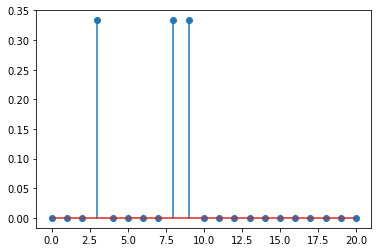

In [215]:
plt.stem(mamShV[0])#aardvark's Shapley vector

In [216]:
nonmamShV

[[0,
  0,
  -0.5833333333333327,
  0,
  0,
  0.0,
  0.0,
  -0.08333333333333334,
  -0.08333333333333334,
  0,
  0,
  0.0,
  0,
  -0.24999999999999992,
  0,
  0,
  0,
  0,
  0.0,
  0,
  0],
 [0,
  0,
  -0.6999999999999991,
  0,
  0,
  0.0,
  0,
  -0.03333333333333334,
  -0.03333333333333334,
  0,
  0,
  0.0,
  0,
  -0.1166666666666667,
  0,
  0,
  0,
  0,
  0.0,
  -0.1166666666666667,
  0],
 [0,
  0,
  -0.5833333333333327,
  0,
  0,
  0.0,
  0.0,
  -0.08333333333333334,
  -0.08333333333333334,
  0,
  0,
  0.0,
  0,
  -0.24999999999999992,
  0,
  0,
  0,
  0,
  0.0,
  0,
  0],
 [0,
  -0.005952380952380952,
  -0.5892857142857136,
  0,
  -0.06547619047619048,
  0,
  0,
  0,
  -0.005952380952380952,
  -0.08928571428571427,
  0,
  0,
  0,
  0,
  -0.005952380952380952,
  0,
  0,
  0,
  -0.005952380952380952,
  -0.23214285714285707,
  0],
 [0,
  0,
  -0.5833333333333327,
  0,
  0,
  0.0,
  0.0,
  -0.08333333333333334,
  -0.08333333333333334,
  0,
  0,
  0.0,
  0,
  -0.24999999999999992,
  0,
 

In [217]:
nonmamShV[0]#the Shapley vector of bass

[0,
 0,
 -0.5833333333333327,
 0,
 0,
 0.0,
 0.0,
 -0.08333333333333334,
 -0.08333333333333334,
 0,
 0,
 0.0,
 0,
 -0.24999999999999992,
 0,
 0,
 0,
 0,
 0.0,
 0,
 0]

<StemContainer object of 3 artists>

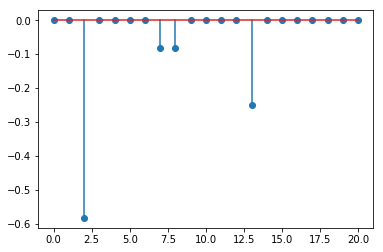

In [218]:
plt.stem(nonmamShV[0])

In [219]:
import numpy as np

In [220]:
np.argwhere(negcl == np.amax(negcl))

array([[ 6],
       [53]])

In [221]:
negcl[6]

0

In [222]:
negcl[-7]

0

In [223]:
negcl[53]

0

In [224]:
nonmamShV[6]

[0, 0, 0.0, 0, 0, 0.0, 0.0, 0, 0, 0, 0, 0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0]

<StemContainer object of 3 artists>

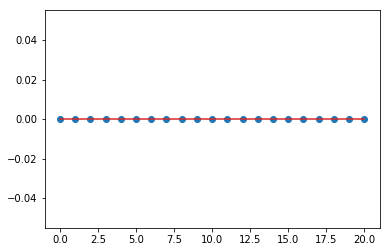

In [225]:
plt.stem(nonmamShV[6])#the Shapley vector of crab

In [226]:
nonmamShV[-7]

[0, 0, 0.0, 0, 0, 0, 0, 0, 0.0, 0.0, 0, 0, 0.0, 0, 0, 0, 0, 0, 0.0, 0, 0.0]

<StemContainer object of 3 artists>

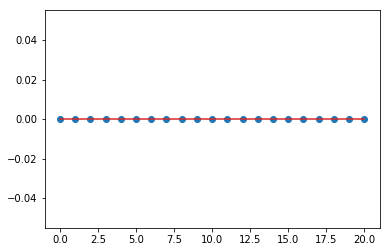

In [227]:
plt.stem(nonmamShV[-7])#the Shapley vector of tortoise

In [228]:
ncz.objects[6]

[0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]

In [229]:
ncz.objects[-7]

[0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1]

In [230]:
mb.int2names(ncz,mb.list2Int(ncz.objects[6]))

['eggs', 'aquatic', 'predator', 'legs (4)']

In [231]:
nc_names[6]

'crab'

In [232]:
mb.int2names(ncz,mb.list2Int(ncz.objects[-7]))

['eggs', 'backbone', 'breathes', 'legs (4)', 'tail', 'catsize']

In [233]:
nc_names[-7]

'tortoise'

In [234]:
mb.int2names(ncz,mb.list2Int(ncz.objects[11]))

['feathers',
 'eggs',
 'airborne',
 'aquatic',
 'backbone',
 'breathes',
 'legs (2)',
 'tail']

In [235]:
nc_names[11]

'duck'

In [236]:
nonmamShV[11]

[0,
 -0.023809523809523808,
 -0.3571428571428572,
 0,
 -0.19047619047619052,
 0.0,
 0,
 0,
 -0.023809523809523808,
 -0.3571428571428572,
 0,
 0,
 0,
 0,
 -0.023809523809523808,
 0,
 0,
 0,
 -0.023809523809523808,
 0,
 0]

<StemContainer object of 3 artists>

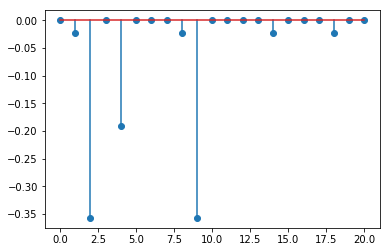

In [237]:
plt.stem(nonmamShV[11])#the Shaply vector of duck

In [238]:
for i in nhypsz:
    print(mb.int2names(ncz,i))

['venomous']
['feathers', 'eggs', 'backbone', 'breathes', 'legs (2)', 'tail']
['eggs', 'airborne', 'breathes']
['predator', 'legs (8)']
['eggs', 'aquatic', 'predator', 'legs (5)']
['eggs', 'legs (0)']
['eggs', 'toothed', 'backbone']
['eggs', 'legs (6)']
['eggs', 'domestic']


In [239]:
mb.int2names(pcz,mb.list2Int(pcz.objects[0]))#aardvark

['hair',
 'milk',
 'predator',
 'toothed',
 'backbone',
 'breathes',
 'legs (4)',
 'catsize']

In [240]:
pc_names[0]

'aardvark'